In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.manifold import TSNE
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Dense, Activation, Flatten

In [2]:
from keras.datasets import cifar100
(train_X, train_y), (test_X, test_y) = cifar100.load_data()

169001437/169001437 [==============================] - 6s 0us/step


In [3]:
train_y = tf.keras.utils.to_categorical(train_y, num_classes=100)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=100)

In [4]:
from sklearn.model_selection import train_test_split
train_X, X_val, train_y, y_val = train_test_split(train_X, train_y, test_size=0.2, random_state=1)

In [5]:
train_X= train_X.reshape(-1,32,32,3)

In [6]:
model = Sequential()
model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1000,activation="relu"))
model.add(Dense(units=100, activation="softmax"))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                    

In [8]:
hist=[]
results=[]

In [9]:
hist


[]

In [10]:
results

[]

In [11]:
train_X.shape

(40000, 32, 32, 3)

In [12]:
train_y.shape

(40000, 100)

In [14]:
from keras.optimizers import SGD,Adam

opt_list=[SGD(lr=0.01),Adam(lr=0.001)]
epochs_list = [5,10,15]
for optimizer in  opt_list:
  for epoch in epochs_list:

    model.compile(optimizer=optimizer, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
    history = model.fit(
      train_X,
      train_y,
      batch_size=64,
      epochs=epoch,
      validation_data=(X_val, y_val)
    )
    hist.append(history.history)
    results.append(model.evaluate(test_X, test_y, batch_size=128))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
625/625 [==============================] - 29s 32ms/step - loss: 4.3530 - accuracy: 0.0381 - val_loss: 4.0166 - val_accuracy: 0.0876
Epoch 2/5
625/625 [==============================] - 21s 33ms/step - loss: 3.9030 - accuracy: 0.0987 - val_loss: 3.7279 - val_accuracy: 0.1231
Epoch 3/5
625/625 [==============================] - 20s 31ms/step - loss: 3.6326 - accuracy: 0.1453 - val_loss: 3.5617 - val_accuracy: 0.1514
Epoch 4/5
625/625 [==============================] - 20s 33ms/step - loss: 3.4049 - accuracy: 0.1810 - val_loss: 3.3606 - val_accuracy: 0.1902
Epoch 5/5
79/79 [==============================] - 2s 17ms/step - loss: 3.2091 - accuracy: 0.2248
Epoch 1/10
625/625 [==============================] - 22s 35ms/step - loss: 2.9879 - accuracy: 0.2564 - val_loss: 3.0622 - val_accuracy: 0.2500
Epoch 2/10
625/625 [==============================] - 20s 33ms/step - loss: 2.7898 - accuracy: 0.2977 - val_loss: 3.0006 - val_accuracy: 0.2648
Epoch 3/10
625/625 [======================

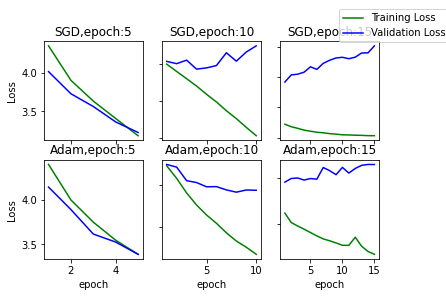

In [15]:
fig, axs = plt.subplots(2, 3)
epoch1=range(1,6)
epoch2 = range(1,11)
epoch3 = range(1,16)


axs[0, 0].set_title('SGD,epoch:5')
axs[0, 0].plot(epoch1,hist[0]['loss'],color="green",label="Training Loss")
axs[0, 0].plot(epoch1,hist[0]['val_loss'],color="blue",label = "Validation Loss")

axs[0, 1].set_title('SGD,epoch:10')
axs[0, 1].plot(epoch2,hist[1]['loss'],color="green")
axs[0, 1].plot(epoch2,hist[1]['val_loss'],color="blue")

axs[0, 2].set_title('SGD,epoch:15')
axs[0, 2].plot(epoch3,hist[2]['loss'],color="green")
axs[0, 2].plot(epoch3,hist[2]['val_loss'],color="blue")

axs[1, 0].set_title('Adam,epoch:5')
axs[1, 0].plot(epoch1,hist[3]['loss'],color="green")
axs[1, 0].plot(epoch1,hist[3]['val_loss'],color="blue")

axs[1, 1].set_title('Adam,epoch:10')
axs[1, 1].plot(epoch2,hist[4]['loss'],color="green")
axs[1, 1].plot(epoch2,hist[4]['val_loss'],color="blue")


axs[1, 2].set_title('Adam,epoch:15')
axs[1, 2].plot(epoch3,hist[5]['loss'],color="green")
axs[1, 2].plot(epoch3,hist[5]['val_loss'],color="blue")
  

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='Loss')

fig.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

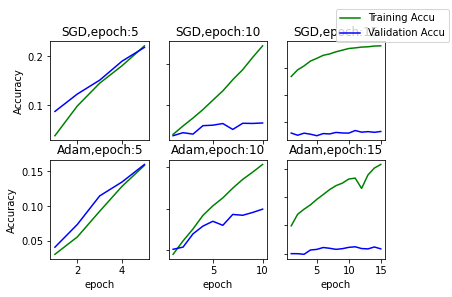

In [16]:
fig, axs = plt.subplots(2, 3)
epoch1=range(1,6)
epoch2 = range(1,11)
epoch3 = range(1,16)
axs[0, 0].set_title('SGD,epoch:5')
axs[0, 0].plot(epoch1,hist[0]['accuracy'],color="green",label="Training Accu")
axs[0, 0].plot(epoch1,hist[0]['val_accuracy'],color="blue",label = "Validation Accu")

axs[0, 1].set_title('SGD,epoch:10' )
axs[0, 1].plot(epoch2,hist[1]['accuracy'],color="green")
axs[0, 1].plot(epoch2,hist[1]['val_accuracy'],color="blue")

axs[0, 2].set_title('SGD,epoch:15')
axs[0, 2].plot(epoch3,hist[2]['accuracy'],color="green")
axs[0, 2].plot(epoch3,hist[2]['val_accuracy'],color="blue")



axs[1, 0].set_title('Adam,epoch:5')
axs[1, 0].plot(epoch1,hist[3]['accuracy'],color="green")
axs[1, 0].plot(epoch1,hist[3]['val_accuracy'],color="blue")

axs[1, 1].set_title('Adam,epoch:10')
axs[1, 1].plot(epoch2,hist[4]['accuracy'],color="green")
axs[1, 1].plot(epoch2,hist[4]['val_accuracy'],color="blue")


axs[1, 2].set_title('Adam,epoch:15')
axs[1, 2].plot(epoch3,hist[5]['accuracy'],color="green")
axs[1, 2].plot(epoch3,hist[5]['val_accuracy'],color="blue")


for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='Accuracy')
    
fig.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [17]:
results

[[3.2090818881988525, 0.2248000055551529],
 [3.466325283050537, 0.3174000084400177],
 [5.977539539337158, 0.33070001006126404],
 [3.3731160163879395, 0.16920000314712524],
 [2.871936082839966, 0.3050000071525574],
 [3.248138427734375, 0.3197000026702881]]